In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.covariance import empirical_covariance 
import matplotlib.pyplot as plt

In [120]:
data = pd.read_csv('airfoil_self_noise.txt', sep = '\t',)

cols = ['frequency','angle', 'chord length','velocity', 'displacement','sound pressure']

data.columns = cols

In [121]:
X = data[cols[0:-1]]
y = data[cols[-1]]
np.shape(X)

(1502, 5)

In [122]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#np.shape(X_train)

In [123]:
#models_to_test = {}
#models_to_test['RF'] = [RandomForestRegressor(),{'n_estimators':[100,200], 'max_features':[2,3] }]

In [124]:
#models_to_test

In [125]:
#for i in models_to_test.keys():
#    grid_search = GridSearchCV(models_to_test[i][0], models_to_test[i][1],n_jobs=-1, cv = 3).fit(X_train,y_train)
    
    
    

In [126]:
#y_pred = grid_search.best_estimator_.predict(X_test)

In [127]:
#from sklearn.metrics import r2_score

In [128]:
#r2_score(y_test,y_pred)

In [129]:
#covariance
#covariance = empirical_covariance(X)


In [130]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures

for i in range (1,7):
    lr = LinearRegression()
    poly = PolynomialFeatures(i)
    Xtrain_poly = poly.fit_transform(X_train)
    lr.fit(Xtrain_poly,y_train)
    Xtest_poly = poly.fit_transform(X_test)
    score = lr.score(Xtest_poly,y_test)
    print(score)




0.23434058759637777
0.2517182804917866
0.31048133080262674
0.3351723384071468
0.357511944549585
0.27158619575382814


In [131]:
X_4= X = data[cols[0:-2]]
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.33, random_state=42)
for i in range (1,7):
    lr = LinearRegression()
    poly = PolynomialFeatures(i)
    Xtrain_poly = poly.fit_transform(X_train)
    lr.fit(Xtrain_poly,y_train)
    Xtest_poly = poly.fit_transform(X_test)
    score = lr.score(Xtest_poly,y_test)
    print(score)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

0.461565283029728
0.5429249323575225
0.6796508244006491
0.6833717222430175
0.6586770729745719
0.23248990676524664


In [154]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.2))
print(X.shape)
X_remove_low_variance = sel.fit_transform(X)
print (X_remove_low_variance.shape)
X_train, X_test, y_train, y_test = train_test_split(X_remove_low_variance, y, test_size=0.33, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(1502, 4)
(1502, 3)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


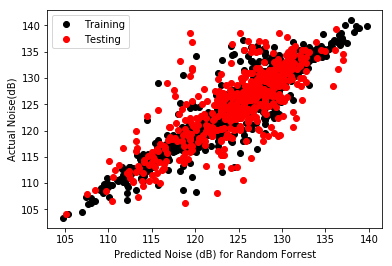

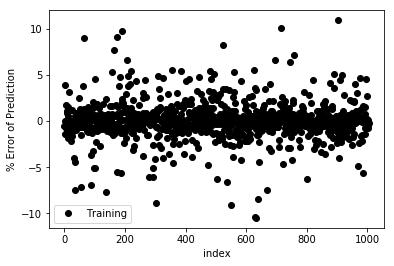

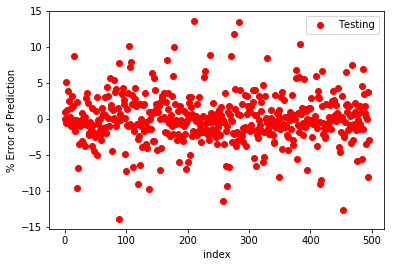

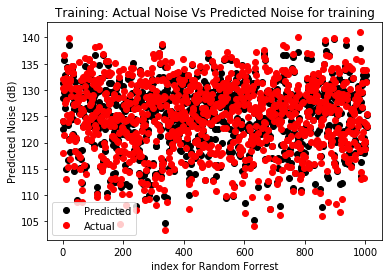

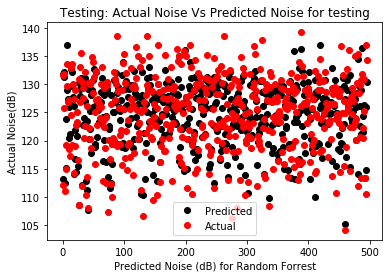

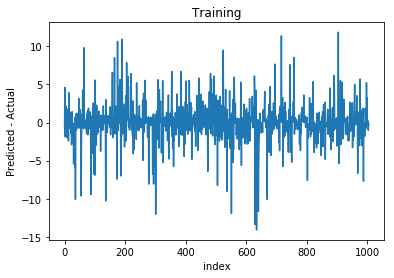

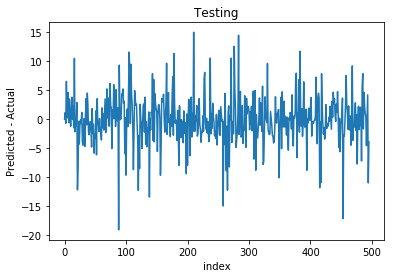

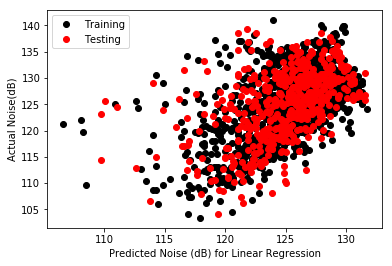

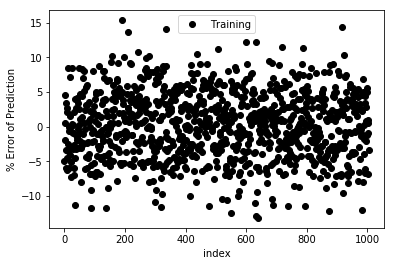

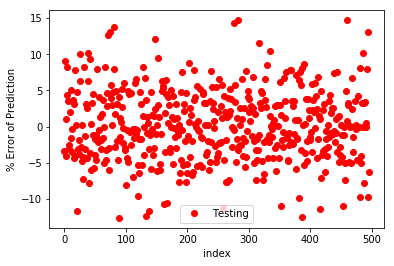

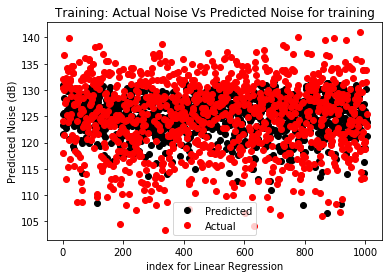

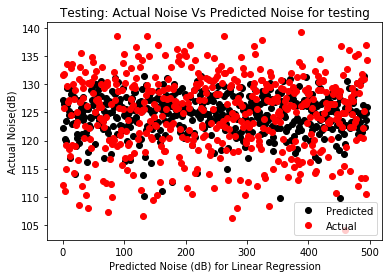

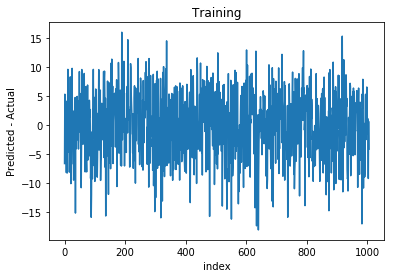

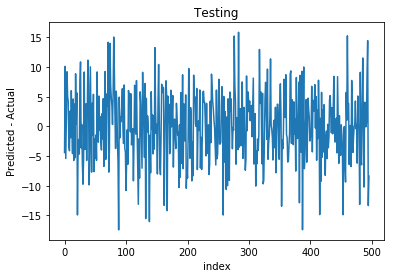

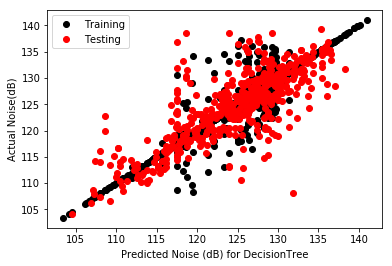

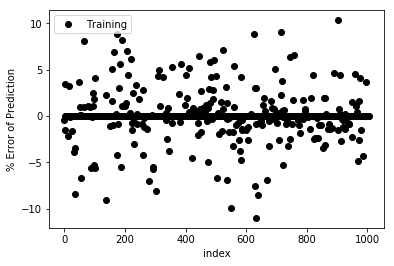

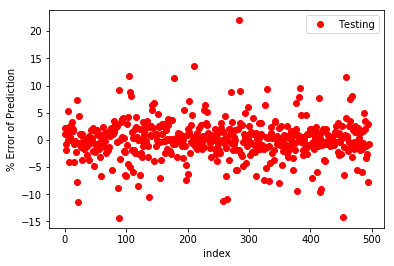

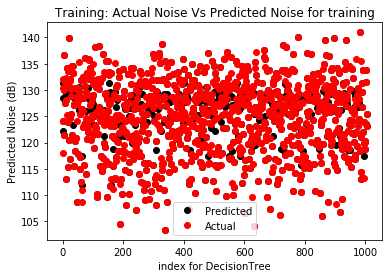

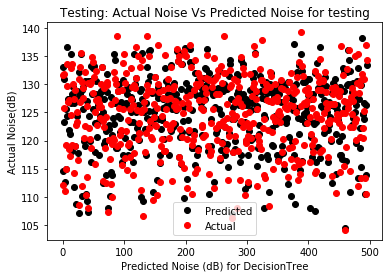

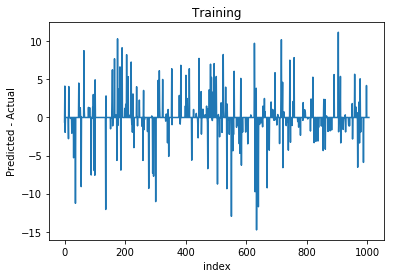

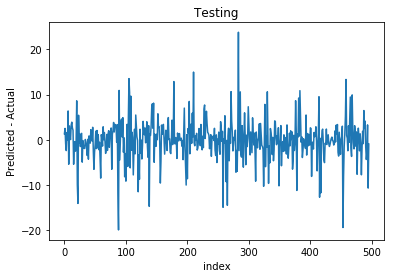

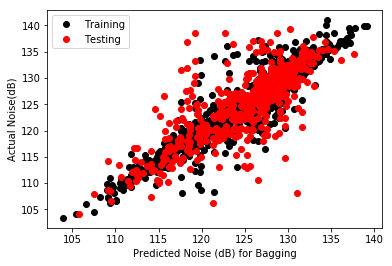

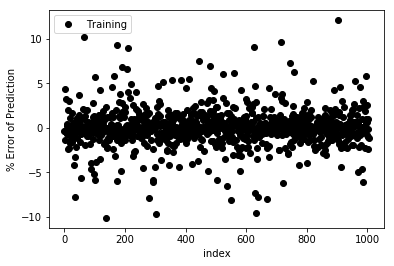

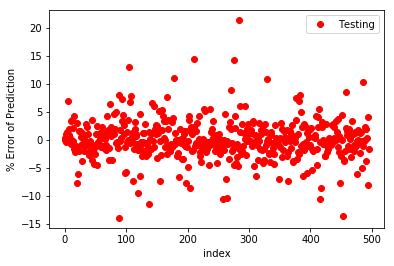

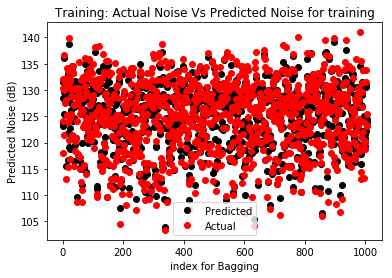

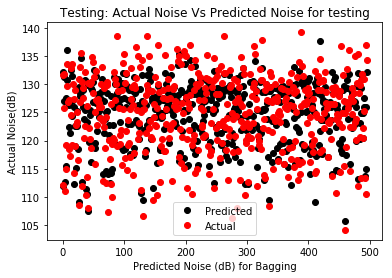

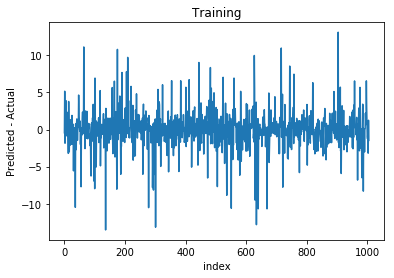

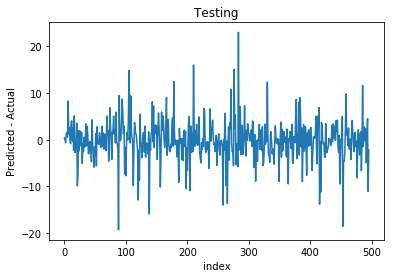

In [165]:
def evaluate_model(list):
    model_name = list[0]
    model = list[1]
    model_parameters = list[2]
    #grid_search = GridSearchCV(model, model_parameters,n_jobs=-1,cv=3).fit(X_train,y_train)
    model.fit(X_train,y_train)
    ytrain_pred = model.predict(X_train)#grid_search.best_estimator_.predict(X_train)
    ytest_pred = model.predict(X_test)#grid_search.best_estimator_.predict(X_test)
    
    train_range = [ i for i in range(y_train.shape[0])]
    test_range = [ i for i in range(y_test.shape[0])]
    
    
    plt.plot(ytrain_pred,y_train,'o',color='black',label='Training')
    plt.plot(ytest_pred,y_test,'o',color='red',label='Testing')
    plt.xlabel('Predicted Noise (dB) for {0}'.format(model_name))
    plt.ylabel('Actual Noise(dB)')
    plt.legend()
    plt.show()
    
    plt.plot(train_range,(ytrain_pred - y_train)* 100 /y_train,'o',color = 'black',label = 'Training')
    plt.xlabel('index')
    plt.ylabel('% Error of Prediction')
    plt.legend()
    plt.show()
    
    plt.plot(test_range,(ytest_pred - y_test)* 100 /y_test,'o',color = 'red',label = 'Testing')
    plt.xlabel('index')
    plt.ylabel('% Error of Prediction')
    plt.legend()
    plt.show()
    
    plt.plot(train_range,ytrain_pred,'o',color='black',label='Predicted')
    plt.plot(train_range,y_train,'o',color='red',label='Actual')
    plt.title('Training: Actual Noise Vs Predicted Noise for training')
    plt.ylabel('Predicted Noise (dB)' )
    plt.xlabel('index for {0}'.format(model_name))
    plt.legend()
    plt.show()
    
    
    plt.plot(test_range,ytest_pred,'o',color='black',label='Predicted')
    plt.plot(test_range,y_test,'o',color='red',label='Actual')
    plt.title('Testing: Actual Noise Vs Predicted Noise for testing')
    plt.xlabel('Predicted Noise (dB) for {0}'.format(model_name))
    plt.ylabel('Actual Noise(dB)')
    plt.legend()
    plt.show()
    
    plt.plot(train_range,ytrain_pred-y_train)
    plt.xlabel('index')
    plt.ylabel('Predicted - Actual')
    plt.title('Training')
    plt.show()
    
    plt.plot(test_range,ytest_pred-y_test)
    plt.xlabel('index')
    plt.ylabel('Predicted - Actual')
    plt.title('Testing')
    plt.show()
    
    
    
    
    
    
models_to_test = {}
models_to_test['RF'] = ['Random Forrest',RandomForestRegressor(),{'n_estimators':[250], 'max_features':[3] }] 
models_to_test['LR'] = ['Linear Regression',LinearRegression(),{}]
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
models_to_test['DecisionTree'] = ['DecisionTree',tree.DecisionTreeRegressor(),[]]
models_to_test['Bagging'] = ['Bagging',BaggingRegressor(),[]]
for i in models_to_test.keys():
    evaluate_model(models_to_test[i])